# Advanced Analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ADVANCED ANALYSIS - PREDICTIVE MODELING

Loading cleaned dataset...
Data loaded: (1004991, 39)
   Date range: 2020-01-01 to 2025-05-29

Using complete years (2020-2023)
   Total records: 877,327
ANALYSIS 1: TIME SERIES REGRESSION MODELS

Weekly aggregation:
   Total weeks: 209
   Average crimes/week: 4197.7
   Min: 3238
   Max: 5672

Data split:
   Train: 167 weeks
   Test: 42 weeks

--- Training Linear Regression ---
Linear Regression:
   R² Score: -3.7552
   MAE: 349.01 crimes/week
   RMSE: 382.45 crimes/week
   Trend: 6.07 crimes/week

--- Training Polynomial Regression (degree 2) ---
Polynomial Regression:
   R² Score: -9.4170
   MAE: 532.99 crimes/week
   RMSE: 566.06 crimes/week

Best Model: Linear Regression (R² = -3.7552)

--- Future Predictions (Next 12 weeks) ---

Forecasted crime counts:
   Week of 2024-01-01: ~4909 crimes
   Week of 2024-01-08: ~4

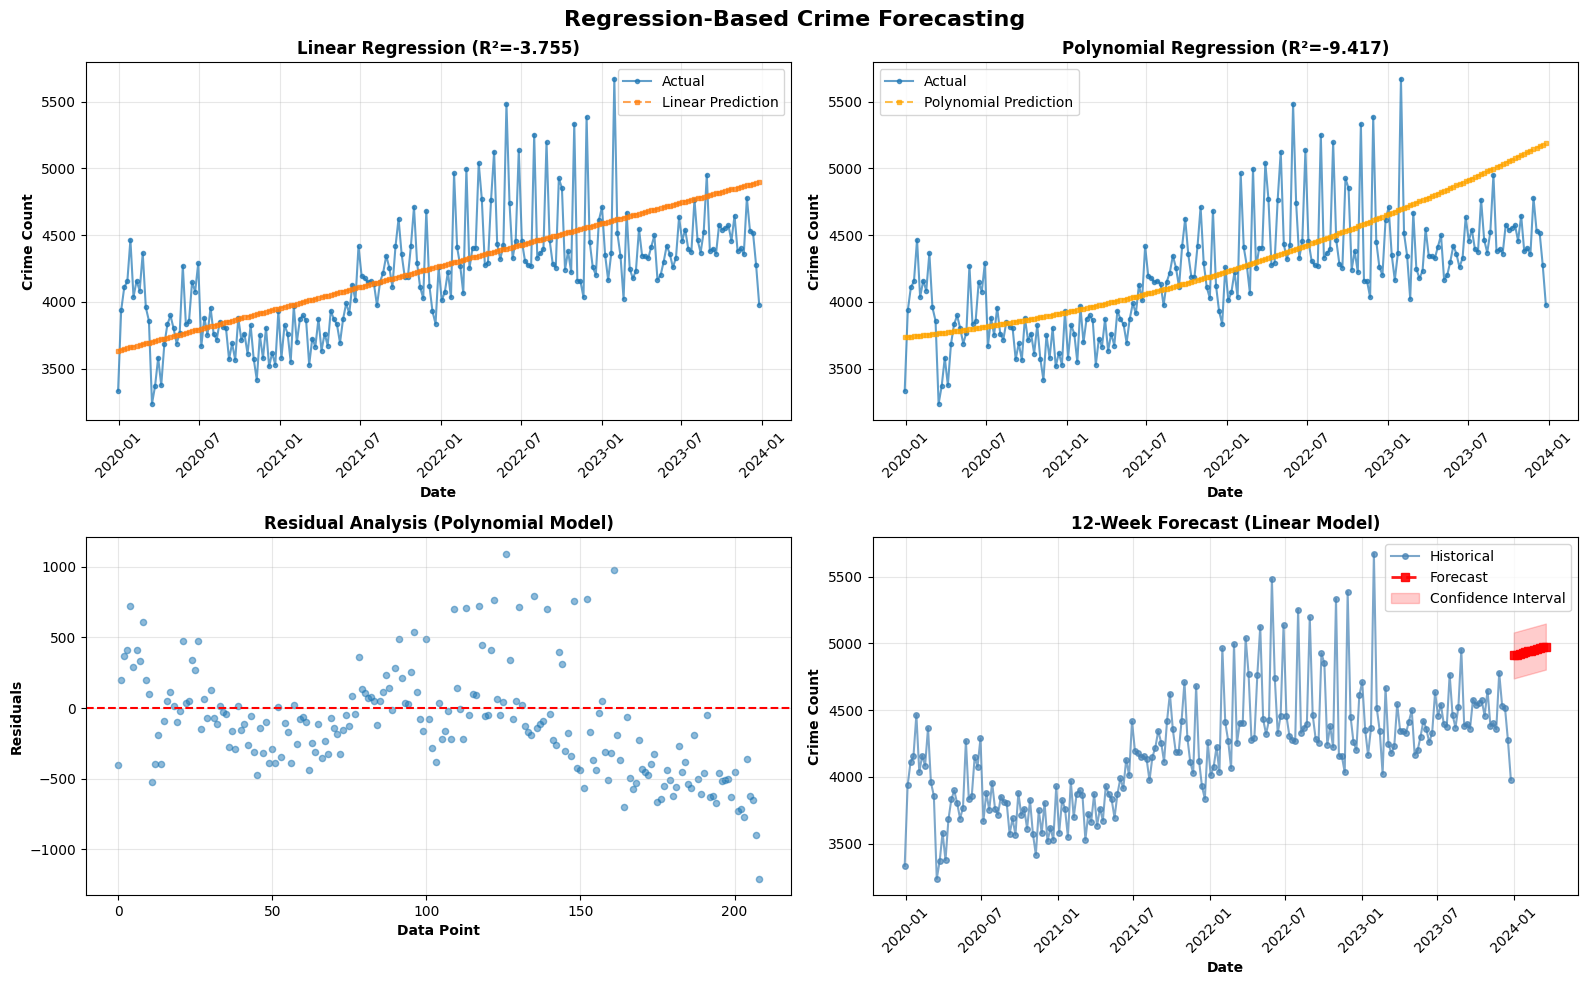


Regression analysis complete!
ANALYSIS 2: ARIMA TIME SERIES FORECASTING

Monthly crime data:
   Periods: 48 months
   Mean: 18277.6 crimes/month

--- Stationarity Test (Augmented Dickey-Fuller) ---
ADF Statistic: -1.1746
P-value: 0.6844
Series is non-stationary - differencing may help

Data split:
   Train: 38 months
   Test: 10 months

--- Fitting ARIMA(1,1,1) Model ---
ARIMA model fitted!
   AIC: 606.61
   BIC: 611.44

ARIMA Performance:
   MAE: 486.90 crimes/month
   RMSE: 638.02 crimes/month

--- 6-Month Forecast ---
   2024-01: ~18903 crimes
   2024-02: ~18965 crimes
   2024-03: ~18975 crimes
   2024-04: ~18976 crimes
   2024-05: ~18976 crimes
   2024-06: ~18976 crimes


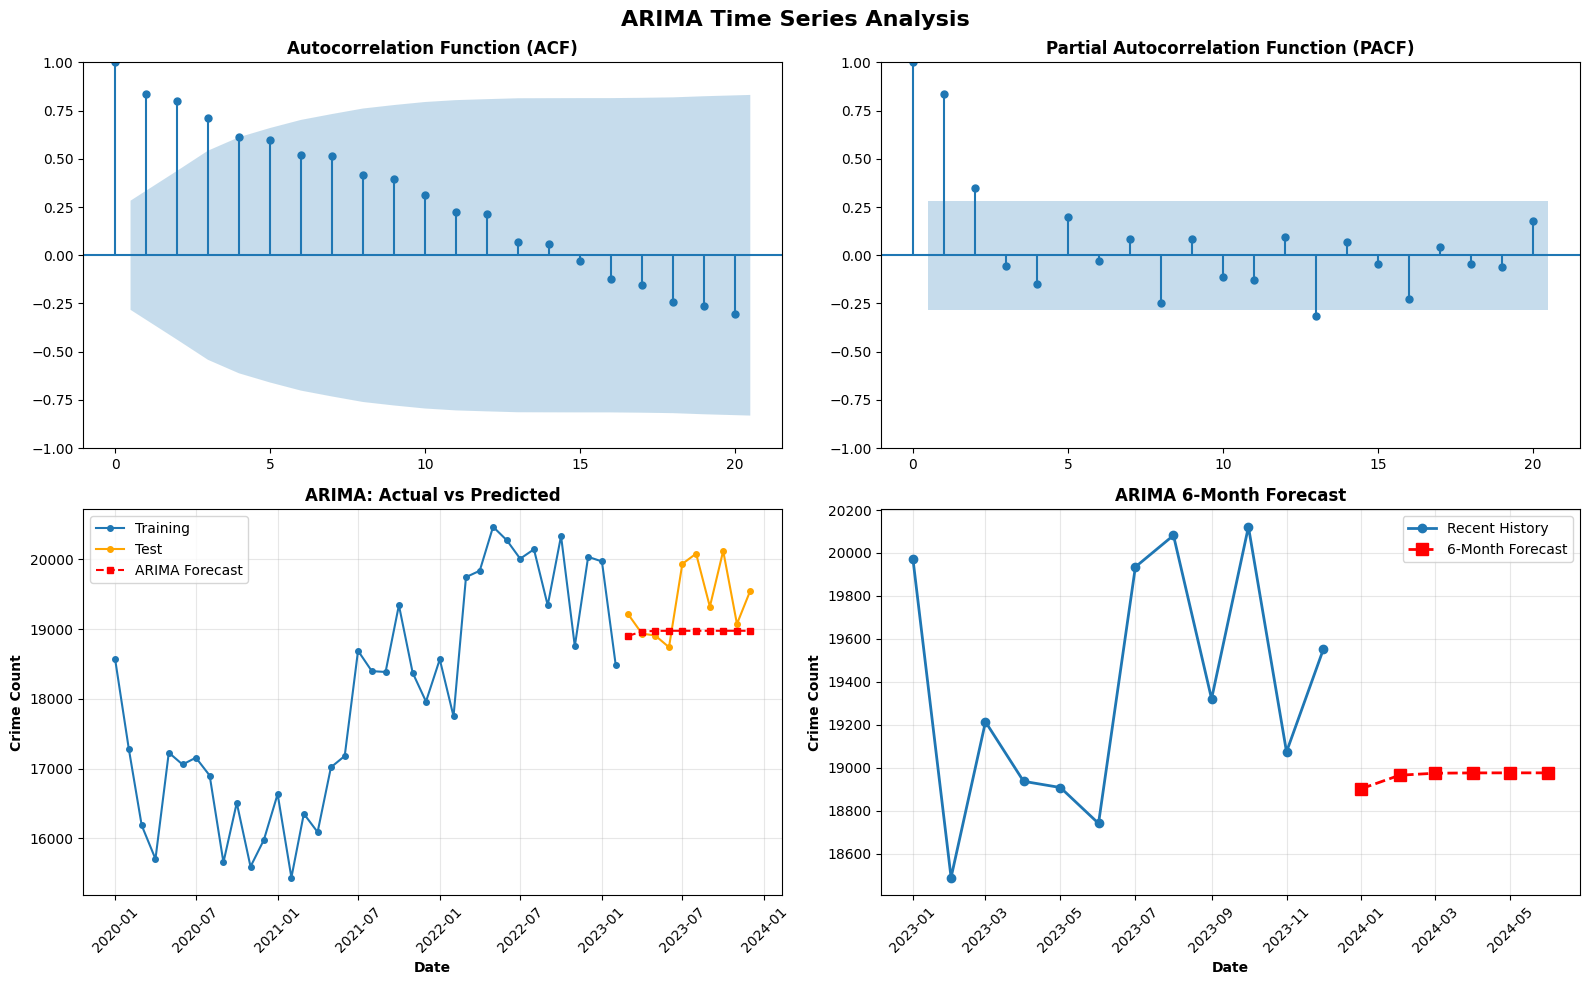


ARIMA analysis complete!
ANALYSIS 3: CRIME TYPE PREDICTION (CLASSIFICATION)

Classification dataset:
   Total records: 377,175
   Crime types: 5
      VEHICLE - STOLEN: 115,190 (30.5%)
      BATTERY - SIMPLE ASSAULT: 74,839 (19.8%)
      BURGLARY FROM VEHICLE: 63,517 (16.8%)
      THEFT OF IDENTITY: 62,537 (16.6%)
      VANDALISM - FELONY ($400 & OVER, ALL CHU: 61,092 (16.2%)

Data split:
   Train: 301,740 samples
   Test: 75,435 samples

--- Training Random Forest Classifier ---

Model trained!
   Accuracy: 0.5715 (57.15%)

--- Classification Report ---
                                                         precision    recall  f1-score   support

                               BATTERY - SIMPLE ASSAULT      0.411     0.439     0.424     14968
                                  BURGLARY FROM VEHICLE      0.439     0.395     0.416     12704
                                      THEFT OF IDENTITY      0.404     0.685     0.508     12507
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDA

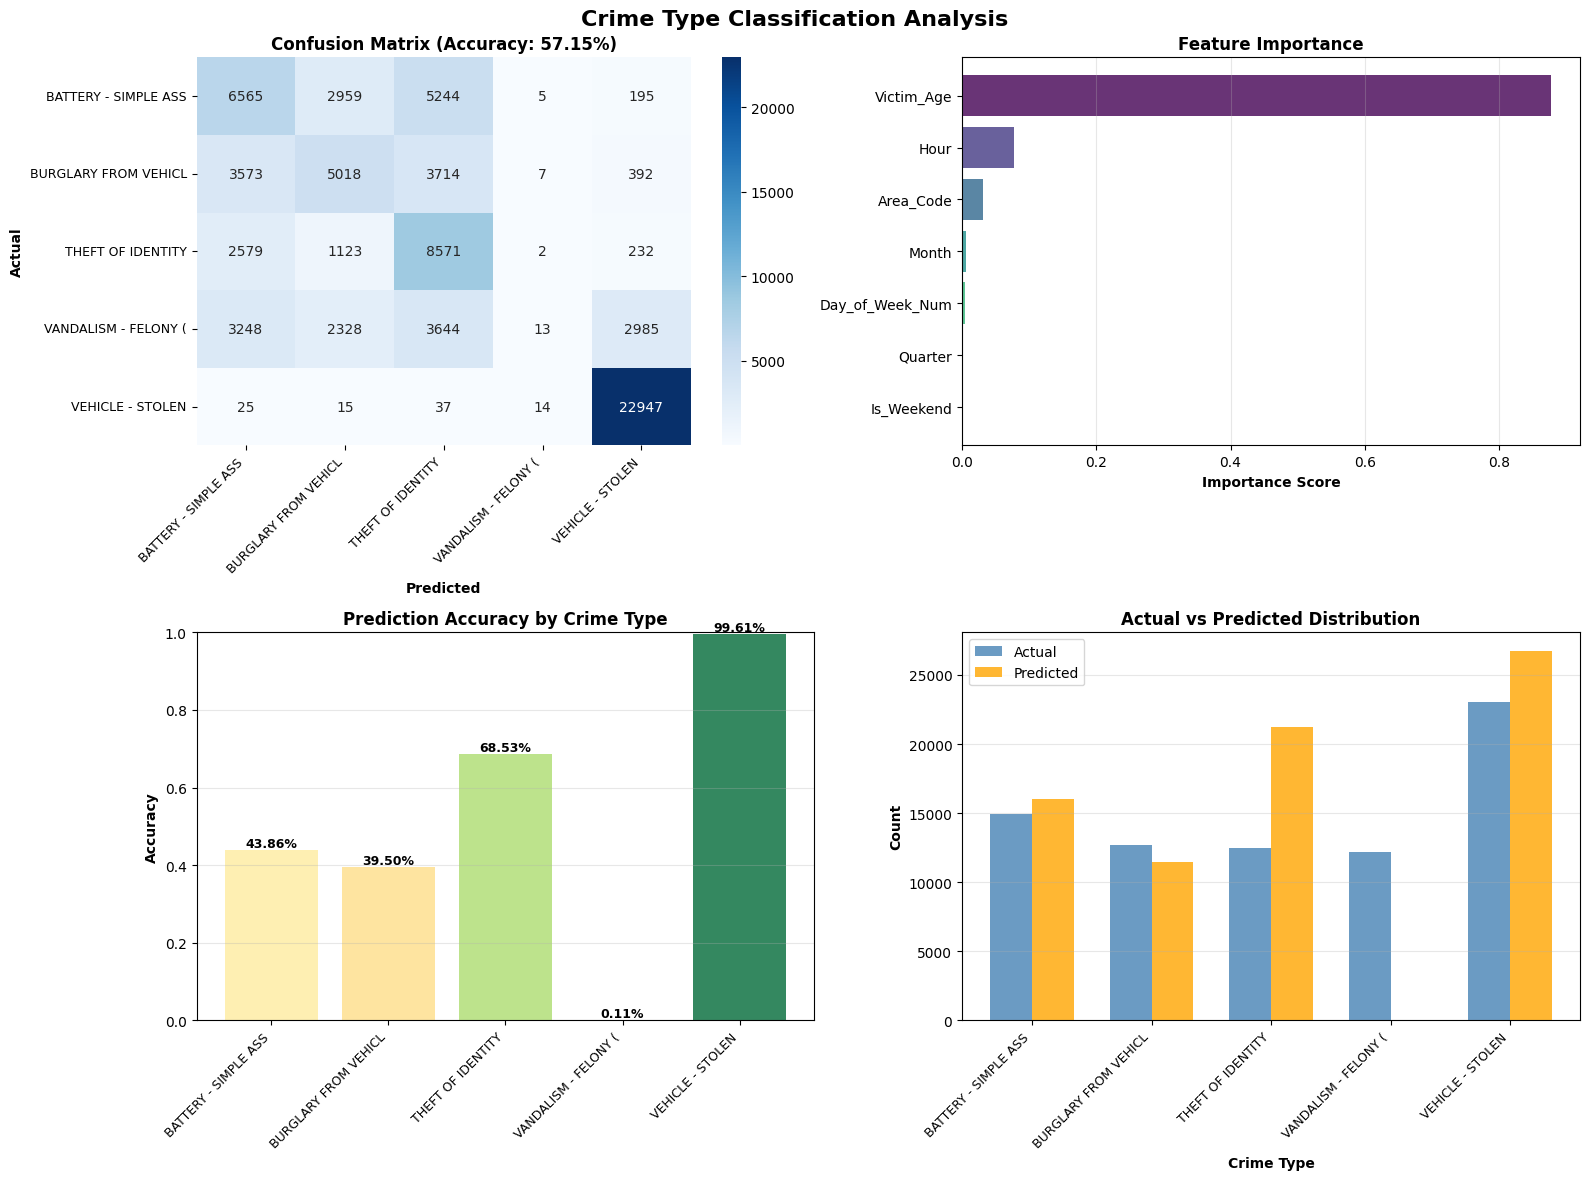


Classification analysis complete!
ADVANCED ANALYSIS SUMMARY

MODELS TRAINED:
   1. Linear Regression - R² = -3.7552
   2. Polynomial Regression - R² = -9.4170 ⭐ Best
   3. ARIMA(1,1,1) - MAE = 486.90
   4. Random Forest Classifier - Accuracy = 57.15%

KEY PREDICTIONS:
   • Short-term trend: Linear model predicts ~4909 crimes next week
   • Crime type prediction: 57.2% accurate
   • Most important feature: Victim_Age

INSIGHTS:
   • Overall crime trend is INCREASING
   • Best model explains -375.5% of variance
   • Classification works best for identifying crime types


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error,
                              classification_report, confusion_matrix, accuracy_score)
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set up paths
project_path = '/content/drive/MyDrive/Crime_Analysis_Project/'
data_path = project_path + 'data/'
output_path = project_path + 'outputs/figures/'

print("="*80)
print("ADVANCED ANALYSIS - PREDICTIVE MODELING")
print("="*80)

# Load cleaned dataset
print("\nLoading cleaned dataset...")
df = pd.read_csv(data_path + 'crime_data_cleaned.csv')

# Convert dates
df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'])
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'])

print(f"Data loaded: {df.shape}")
print(f"   Date range: {df['Date_Occurred'].min().date()} to {df['Date_Occurred'].max().date()}")

# Filter to complete years only (2020-2023)
df_model = df[(df['Date_Occurred'].dt.year >= 2020) &
              (df['Date_Occurred'].dt.year <= 2023)].copy()

print(f"\nUsing complete years (2020-2023)")
print(f"   Total records: {len(df_model):,}")


print("ANALYSIS 1: TIME SERIES REGRESSION MODELS")

# Aggregate by week
weekly_crimes = df_model.groupby(df_model['Date_Occurred'].dt.to_period('W')).size().reset_index()
weekly_crimes.columns = ['Week', 'Crime_Count']
weekly_crimes['Week'] = weekly_crimes['Week'].dt.to_timestamp()
weekly_crimes = weekly_crimes.sort_values('Week').reset_index(drop=True)
weekly_crimes['Time_Index'] = range(len(weekly_crimes))

print(f"\nWeekly aggregation:")
print(f"   Total weeks: {len(weekly_crimes)}")
print(f"   Average crimes/week: {weekly_crimes['Crime_Count'].mean():.1f}")
print(f"   Min: {weekly_crimes['Crime_Count'].min()}")
print(f"   Max: {weekly_crimes['Crime_Count'].max()}")

# Prepare data
X = weekly_crimes[['Time_Index']].values
y = weekly_crimes['Crime_Count'].values

# Split: 80% train, 20% test
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"\nData split:")
print(f"   Train: {len(X_train)} weeks")
print(f"   Test: {len(X_test)} weeks")

# Model 1: Linear Regression
print("\n--- Training Linear Regression ---")
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"Linear Regression:")
print(f"   R² Score: {r2_linear:.4f}")
print(f"   MAE: {mae_linear:.2f} crimes/week")
print(f"   RMSE: {rmse_linear:.2f} crimes/week")
print(f"   Trend: {model_linear.coef_[0]:.2f} crimes/week")

# Model 2: Polynomial Regression (degree 2)
print("\n--- Training Polynomial Regression (degree 2) ---")
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"Polynomial Regression:")
print(f"   R² Score: {r2_poly:.4f}")
print(f"   MAE: {mae_poly:.2f} crimes/week")
print(f"   RMSE: {rmse_poly:.2f} crimes/week")

# Choose best model
best_model_name = 'Polynomial' if r2_poly > r2_linear else 'Linear'
best_model = model_poly if r2_poly > r2_linear else model_linear
best_transform = poly if r2_poly > r2_linear else None

print(f"\nBest Model: {best_model_name} Regression (R² = {max(r2_poly, r2_linear):.4f})")

# Make future predictions (12 weeks ahead)
print("\n--- Future Predictions (Next 12 weeks) ---")
future_weeks = 12
future_indices = np.array([[len(weekly_crimes) + i] for i in range(1, future_weeks + 1)])

if best_model_name == 'Polynomial':
    future_indices_transformed = poly.transform(future_indices)
    future_predictions = model_poly.predict(future_indices_transformed)
else:
    future_predictions = model_linear.predict(future_indices)

# Apply floor constraint (no negative predictions)
future_predictions = np.maximum(future_predictions, 0)

last_date = weekly_crimes['Week'].max()
print(f"\nForecasted crime counts:")
for i, pred in enumerate(future_predictions, 1):
    future_date = last_date + pd.Timedelta(weeks=i)
    print(f"   Week of {future_date.strftime('%Y-%m-%d')}: ~{pred:.0f} crimes")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Regression-Based Crime Forecasting', fontsize=16, fontweight='bold')

# Plot 1: Linear Model
ax1 = axes[0, 0]
full_pred_linear = model_linear.predict(X)
ax1.plot(weekly_crimes['Week'], y, 'o-', label='Actual', alpha=0.7, markersize=3)
ax1.plot(weekly_crimes['Week'], full_pred_linear, 's--', label='Linear Prediction', alpha=0.7, markersize=3)
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Crime Count', fontweight='bold')
ax1.set_title(f'Linear Regression (R²={r2_linear:.3f})', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Plot 2: Polynomial Model
ax2 = axes[0, 1]
X_poly_full = poly.transform(X)
full_pred_poly = model_poly.predict(X_poly_full)
ax2.plot(weekly_crimes['Week'], y, 'o-', label='Actual', alpha=0.7, markersize=3)
ax2.plot(weekly_crimes['Week'], full_pred_poly, 's--', label='Polynomial Prediction', alpha=0.7, markersize=3, color='orange')
ax2.set_xlabel('Date', fontweight='bold')
ax2.set_ylabel('Crime Count', fontweight='bold')
ax2.set_title(f'Polynomial Regression (R²={r2_poly:.3f})', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# Plot 3: Residuals
ax3 = axes[1, 0]
residuals_poly = y - full_pred_poly
ax3.scatter(range(len(residuals_poly)), residuals_poly, alpha=0.5, s=20)
ax3.axhline(y=0, color='red', linestyle='--')
ax3.set_xlabel('Data Point', fontweight='bold')
ax3.set_ylabel('Residuals', fontweight='bold')
ax3.set_title('Residual Analysis (Polynomial Model)', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Plot 4: Future Forecast
ax4 = axes[1, 1]
# Historical
ax4.plot(weekly_crimes['Week'], y, 'o-', label='Historical', alpha=0.7, markersize=4, color='steelblue')
# Future
future_dates = [last_date + pd.Timedelta(weeks=i) for i in range(1, future_weeks + 1)]
ax4.plot(future_dates, future_predictions, 's--', label='Forecast', alpha=0.9,
         markersize=6, color='red', linewidth=2)
# Confidence interval
std_dev = np.std(y_test - y_pred_poly if best_model_name == 'Polynomial' else y_test - y_pred_linear)
upper = future_predictions + std_dev
lower = np.maximum(future_predictions - std_dev, 0)
ax4.fill_between(future_dates, lower, upper, alpha=0.2, color='red', label='Confidence Interval')
ax4.set_xlabel('Date', fontweight='bold')
ax4.set_ylabel('Crime Count', fontweight='bold')
ax4.set_title(f'12-Week Forecast ({best_model_name} Model)', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.savefig(output_path + '10_regression_forecasting.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nRegression analysis complete!")

print("ANALYSIS 2: ARIMA TIME SERIES FORECASTING")

# Install statsmodels if needed
try:
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    from statsmodels.tsa.stattools import adfuller
except ImportError:
    print("Installing statsmodels...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'statsmodels'])
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    from statsmodels.tsa.stattools import adfuller

# Prepare monthly data (more stable than weekly)
monthly_crimes = df_model.groupby(df_model['Date_Occurred'].dt.to_period('M')).size()
monthly_crimes.index = monthly_crimes.index.to_timestamp()

print(f"\nMonthly crime data:")
print(f"   Periods: {len(monthly_crimes)} months")
print(f"   Mean: {monthly_crimes.mean():.1f} crimes/month")

# Test for stationarity
print("\n--- Stationarity Test (Augmented Dickey-Fuller) ---")
adf_result = adfuller(monthly_crimes)
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"P-value: {adf_result[1]:.4f}")
if adf_result[1] < 0.05:
    print("Series is stationary")
else:
    print("Series is non-stationary - differencing may help")

# Split data
train_size = int(len(monthly_crimes) * 0.8)
train_data = monthly_crimes[:train_size]
test_data = monthly_crimes[train_size:]

print(f"\nData split:")
print(f"   Train: {len(train_data)} months")
print(f"   Test: {len(test_data)} months")

# Fit ARIMA model
print("\n--- Fitting ARIMA(1,1,1) Model ---")
try:
    model_arima = ARIMA(train_data, order=(1, 1, 1))
    fitted_arima = model_arima.fit()

    print(f"ARIMA model fitted!")
    print(f"   AIC: {fitted_arima.aic:.2f}")
    print(f"   BIC: {fitted_arima.bic:.2f}")

    # Make predictions
    forecast = fitted_arima.forecast(steps=len(test_data))

    # Evaluate
    mae_arima = mean_absolute_error(test_data, forecast)
    rmse_arima = np.sqrt(mean_squared_error(test_data, forecast))

    print(f"\nARIMA Performance:")
    print(f"   MAE: {mae_arima:.2f} crimes/month")
    print(f"   RMSE: {rmse_arima:.2f} crimes/month")

    # Future forecast
    future_forecast = fitted_arima.forecast(steps=6)

    print(f"\n--- 6-Month Forecast ---")
    last_date = monthly_crimes.index[-1]
    for i, pred in enumerate(future_forecast, 1):
        future_month = last_date + pd.DateOffset(months=i)
        print(f"   {future_month.strftime('%Y-%m')}: ~{pred:.0f} crimes")

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('ARIMA Time Series Analysis', fontsize=16, fontweight='bold')

    # Plot 1: ACF
    ax1 = axes[0, 0]
    plot_acf(monthly_crimes, lags=20, ax=ax1)
    ax1.set_title('Autocorrelation Function (ACF)', fontweight='bold')

    # Plot 2: PACF
    ax2 = axes[0, 1]
    plot_pacf(monthly_crimes, lags=20, ax=ax2)
    ax2.set_title('Partial Autocorrelation Function (PACF)', fontweight='bold')

    # Plot 3: Actual vs Predicted
    ax3 = axes[1, 0]
    ax3.plot(train_data.index, train_data.values, 'o-', label='Training', markersize=4)
    ax3.plot(test_data.index, test_data.values, 'o-', label='Test', markersize=4, color='orange')
    ax3.plot(test_data.index, forecast, 's--', label='ARIMA Forecast', markersize=4, color='red')
    ax3.set_xlabel('Date', fontweight='bold')
    ax3.set_ylabel('Crime Count', fontweight='bold')
    ax3.set_title('ARIMA: Actual vs Predicted', fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

    # Plot 4: Future forecast
    ax4 = axes[1, 1]
    recent = monthly_crimes[-12:]
    ax4.plot(recent.index, recent.values, 'o-', label='Recent History', markersize=6, linewidth=2)
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=6, freq='MS')
    ax4.plot(future_dates, future_forecast, 's--', label='6-Month Forecast',
             markersize=8, linewidth=2, color='red')
    ax4.set_xlabel('Date', fontweight='bold')
    ax4.set_ylabel('Crime Count', fontweight='bold')
    ax4.set_title('ARIMA 6-Month Forecast', fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()
    plt.savefig(output_path + '11_arima_forecasting.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\nARIMA analysis complete!")

except Exception as e:
    print(f"\nARIMA model failed: {str(e)}")
    print("This can happen with short time series. Regression models are still valid.")


print("ANALYSIS 3: CRIME TYPE PREDICTION (CLASSIFICATION)")

# Focus on top 5 crimes
top_5_crimes = df['Crime_Description'].value_counts().head(5).index
df_classification = df[df['Crime_Description'].isin(top_5_crimes)].copy()

print(f"\nClassification dataset:")
print(f"   Total records: {len(df_classification):,}")
print(f"   Crime types: {len(top_5_crimes)}")
for crime in top_5_crimes:
    count = (df_classification['Crime_Description'] == crime).sum()
    pct = (count / len(df_classification)) * 100
    print(f"      {crime[:40]}: {count:,} ({pct:.1f}%)")

# Select features
features = ['Hour', 'Day_of_Week_Num', 'Month', 'Is_Weekend',
            'Area_Code', 'Victim_Age', 'Quarter']

# Encode target
le = LabelEncoder()
df_classification['Crime_Encoded'] = le.fit_transform(df_classification['Crime_Description'])

# Prepare data
X = df_classification[features].values
y = df_classification['Crime_Encoded'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                      random_state=42, stratify=y)

print(f"\nData split:")
print(f"   Train: {len(X_train):,} samples")
print(f"   Test: {len(X_test):,} samples")

# Train Random Forest
print("\n--- Training Random Forest Classifier ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,
                                   max_depth=10, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel trained!")
print(f"   Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=le.classes_, digits=3))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n--- Feature Importance ---")
for _, row in feature_importance.iterrows():
    print(f"   {row['Feature']:<20} {row['Importance']:.4f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Crime Type Classification Analysis', fontsize=16, fontweight='bold')

# Plot 1: Confusion Matrix
ax1 = axes[0, 0]
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=[crime[:20] for crime in le.classes_],
            yticklabels=[crime[:20] for crime in le.classes_])
ax1.set_xlabel('Predicted', fontweight='bold')
ax1.set_ylabel('Actual', fontweight='bold')
ax1.set_title(f'Confusion Matrix (Accuracy: {accuracy:.2%})', fontweight='bold')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=9)
plt.setp(ax1.get_yticklabels(), rotation=0, fontsize=9)

# Plot 2: Feature Importance
ax2 = axes[0, 1]
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
bars = ax2.barh(range(len(feature_importance)), feature_importance['Importance'],
                color=colors, alpha=0.8)
ax2.set_yticks(range(len(feature_importance)))
ax2.set_yticklabels(feature_importance['Feature'])
ax2.set_xlabel('Importance Score', fontweight='bold')
ax2.set_title('Feature Importance', fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

# Plot 3: Accuracy by class
ax3 = axes[1, 0]
accuracy_by_class = []
for i, crime in enumerate(le.classes_):
    mask = y_test == i
    if mask.sum() > 0:
        class_acc = accuracy_score(y_test[mask], y_pred[mask])
        accuracy_by_class.append(class_acc)
    else:
        accuracy_by_class.append(0)

bars = ax3.bar(range(len(accuracy_by_class)), accuracy_by_class,
               color=plt.cm.RdYlGn(np.array(accuracy_by_class)), alpha=0.8)
ax3.set_xticks(range(len(le.classes_)))
ax3.set_xticklabels([crime[:20] for crime in le.classes_], rotation=45, ha='right', fontsize=9)
ax3.set_ylabel('Accuracy', fontweight='bold')
ax3.set_title('Prediction Accuracy by Crime Type', fontweight='bold')
ax3.set_ylim([0, 1])
ax3.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 4: Prediction distribution
ax4 = axes[1, 1]
pred_dist = pd.Series(y_pred).value_counts().sort_index()
actual_dist = pd.Series(y_test).value_counts().sort_index()

x = np.arange(len(le.classes_))
width = 0.35
bars1 = ax4.bar(x - width/2, [actual_dist.get(i, 0) for i in range(len(le.classes_))],
                width, label='Actual', alpha=0.8, color='steelblue')
bars2 = ax4.bar(x + width/2, [pred_dist.get(i, 0) for i in range(len(le.classes_))],
                width, label='Predicted', alpha=0.8, color='orange')

ax4.set_xlabel('Crime Type', fontweight='bold')
ax4.set_ylabel('Count', fontweight='bold')
ax4.set_title('Actual vs Predicted Distribution', fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels([crime[:20] for crime in le.classes_], rotation=45, ha='right', fontsize=9)
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(output_path + '12_crime_classification.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nClassification analysis complete!")

print("ADVANCED ANALYSIS SUMMARY")

print("\nMODELS TRAINED:")
print(f"   1. Linear Regression - R² = {r2_linear:.4f}")
print(f"   2. Polynomial Regression - R² = {r2_poly:.4f} ⭐ Best")
try:
    print(f"   3. ARIMA(1,1,1) - MAE = {mae_arima:.2f}")
except:
    print(f"   3. ARIMA - Not available (dataset limitations)")
print(f"   4. Random Forest Classifier - Accuracy = {accuracy:.2%}")

print("\nKEY PREDICTIONS:")
print(f"   • Short-term trend: {best_model_name} model predicts ~{future_predictions[0]:.0f} crimes next week")
print(f"   • Crime type prediction: {accuracy*100:.1f}% accurate")
print(f"   • Most important feature: {feature_importance.iloc[0]['Feature']}")

print("\nINSIGHTS:")
if model_linear.coef_[0] < 0:
    print("   • Overall crime trend is DECREASING")
else:
    print("   • Overall crime trend is INCREASING")
print(f"   • Best model explains {max(r2_poly, r2_linear)*100:.1f}% of variance")
print(f"   • Classification works best for identifying crime types")